In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from scipy import stats
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score, KFold
import warnings
warnings.filterwarnings("ignore")

In [7]:
df = pd.read_csv('/content/Life Expectancy Data.csv')
print(df.head())

       Country  Year      Status  Life expectancy   Adult Mortality  \
0  Afghanistan  2015  Developing              65.0            263.0   
1  Afghanistan  2014  Developing              59.9            271.0   
2  Afghanistan  2013  Developing              59.9            268.0   
3  Afghanistan  2012  Developing              59.5            272.0   
4  Afghanistan  2011  Developing              59.2            275.0   

   infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   ...  \
0             62     0.01               71.279624         65.0      1154  ...   
1             64     0.01               73.523582         62.0       492  ...   
2             66     0.01               73.219243         64.0       430  ...   
3             69     0.01               78.184215         67.0      2787  ...   
4             71     0.01                7.097109         68.0      3013  ...   

   Polio  Total expenditure  Diphtheria    HIV/AIDS         GDP  Population  \
0    6.

In [8]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [9]:
df.isnull().sum()

,0
Country,0
Year,0
Status,0
Life expectancy,10
Adult Mortality,10
infant deaths,0
Alcohol,194
percentage expenditure,0
Hepatitis B,553
Measles,0


In [10]:
df.columns = df.columns.str.strip().str.replace(' ', '_')

In [11]:
df.columns

Index(['Country', 'Year', 'Status', 'Life_expectancy', 'Adult_Mortality',
       'infant_deaths', 'Alcohol', 'percentage_expenditure', 'Hepatitis_B',
       'Measles', 'BMI', 'under-five_deaths', 'Polio', 'Total_expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness__1-19_years',
       'thinness_5-9_years', 'Income_composition_of_resources', 'Schooling'],
      dtype='object')

In [12]:
numerical_cols = ['Life_expectancy', 'Adult_Mortality', 'Alcohol', 'Hepatitis_B',
                  'BMI', 'Polio', 'Total_expenditure', 'Diphtheria', 'GDP',
                  'Population', 'thinness__1-19_years', 'thinness_5-9_years',
                  'Income_composition_of_resources', 'Schooling']
for col in numerical_cols:
    df[col].fillna(df[col].mean(), inplace=True)


In [13]:
df.drop_duplicates(inplace=True)

In [15]:
scaler = StandardScaler()
numerical_cols = [col for col in df.select_dtypes(include='float64').columns if col != 'Life_expectancy']
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [14]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life_expectancy                  2938 non-null   float64
 4   Adult_Mortality                  2938 non-null   float64
 5   infant_deaths                    2938 non-null   int64  
 6   Alcohol                          2938 non-null   float64
 7   percentage_expenditure           2938 non-null   float64
 8   Hepatitis_B                      2938 non-null   float64
 9   Measles                          2938 non-null   int64  
 10  BMI                              2938 non-null   float64
 11  under-five_deaths                2938 non-null   int64  
 12  Polio               

,0
Country,0
Year,0
Status,0
Life_expectancy,0
Adult_Mortality,0
infant_deaths,0
Alcohol,0
percentage_expenditure,0
Hepatitis_B,0
Measles,0


Check the outliers

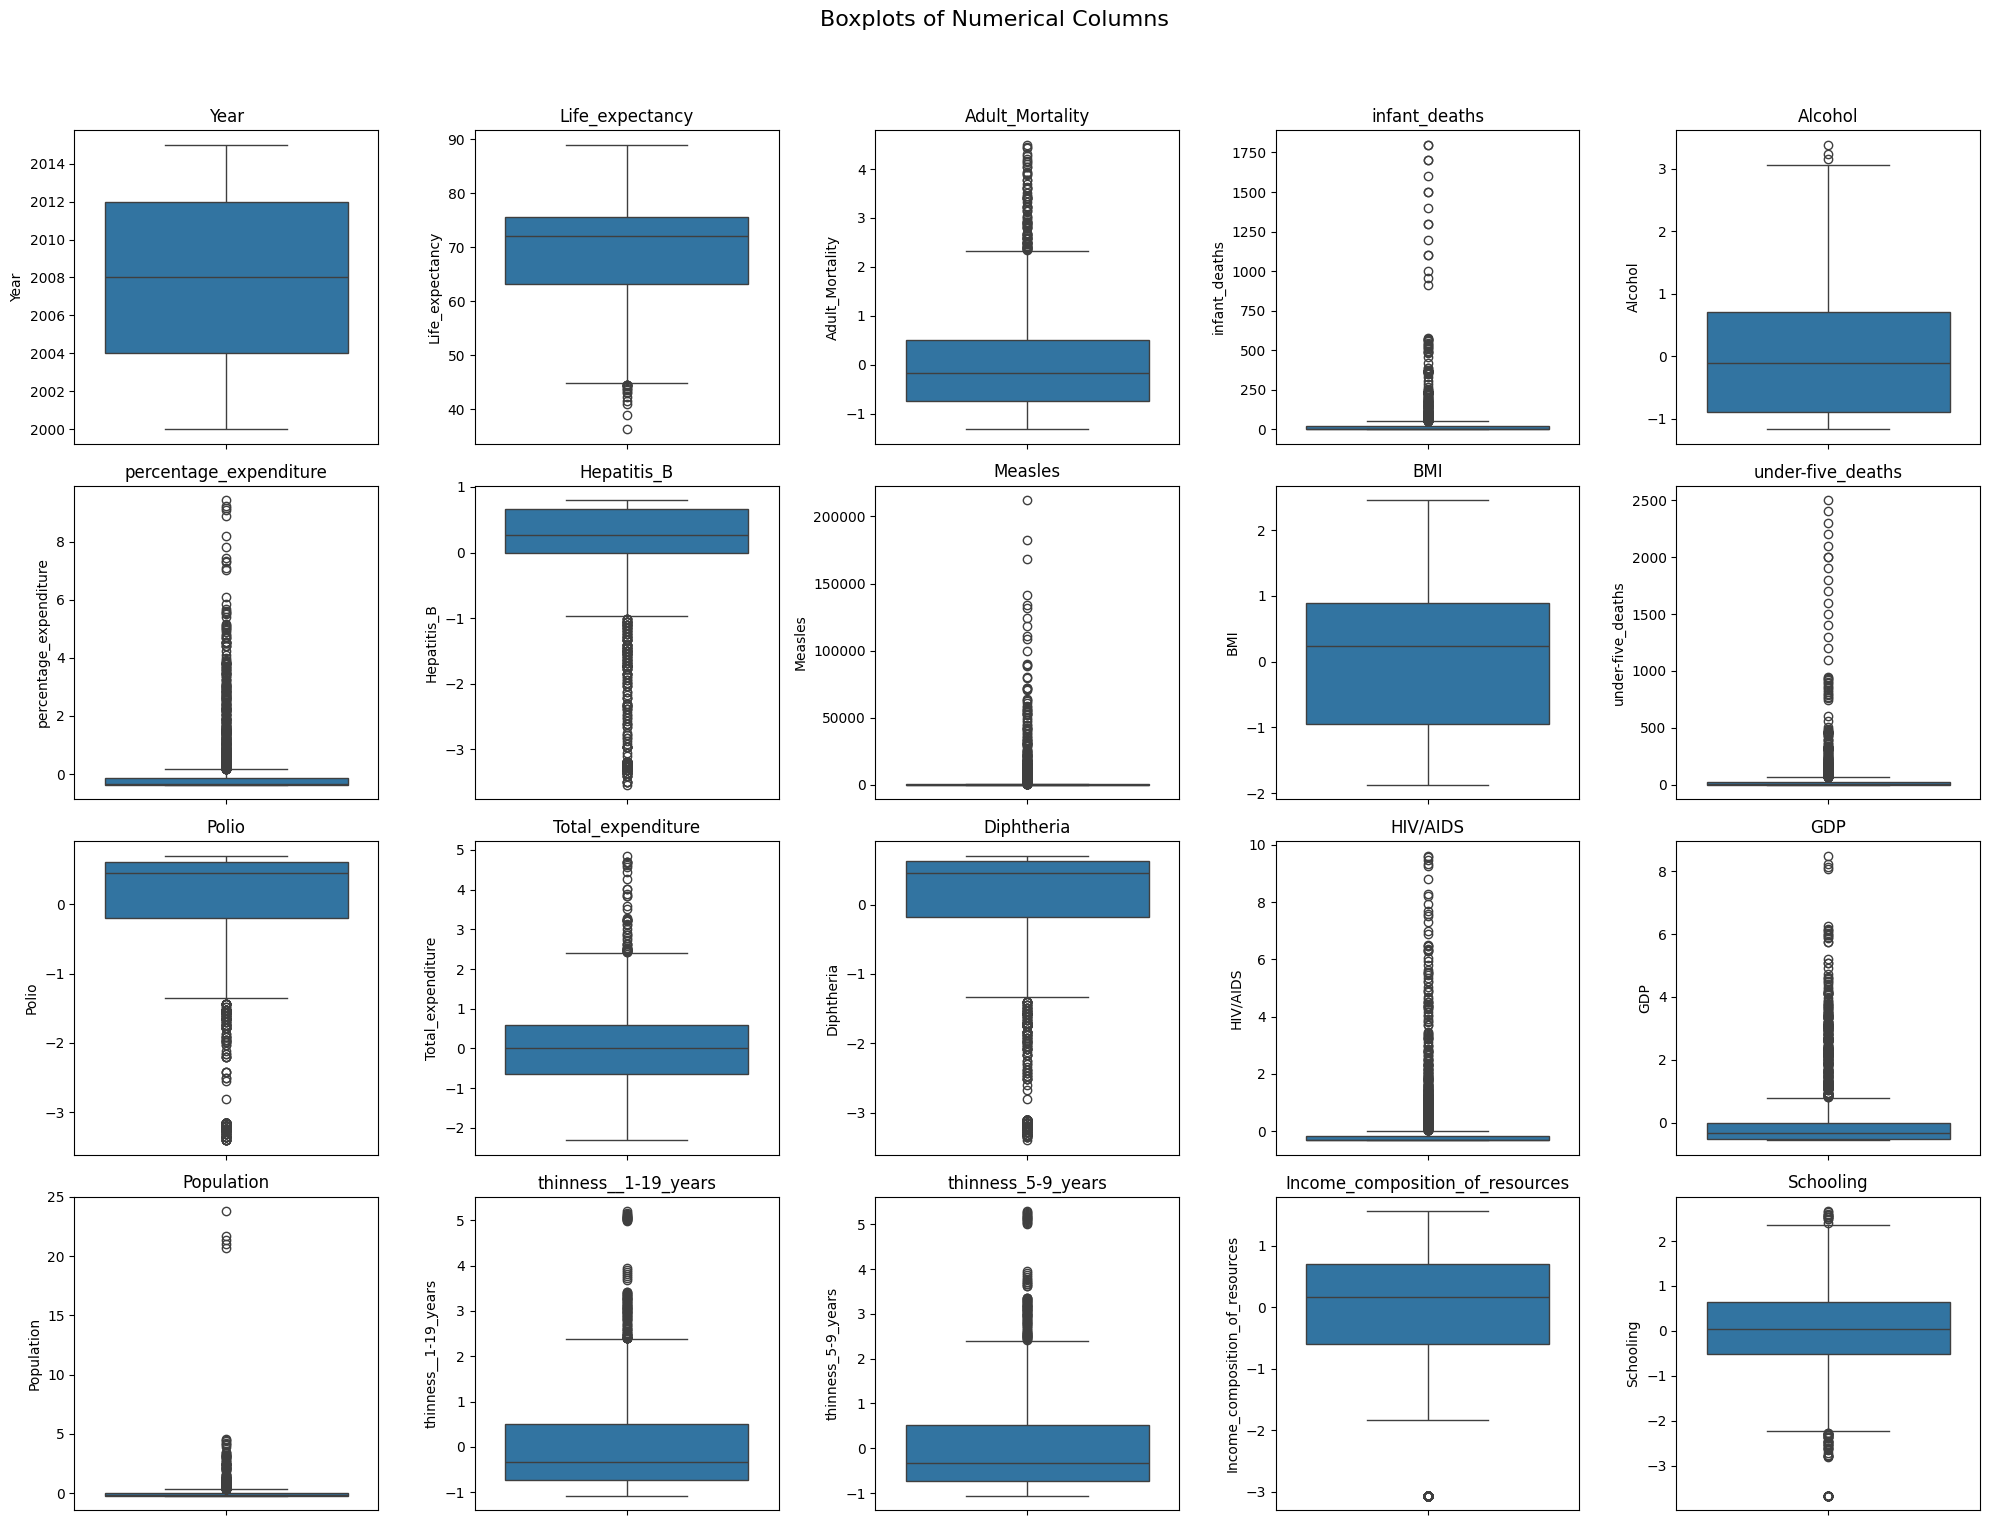

In [16]:
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
fig, axes = plt.subplots(4, 5, figsize=(20, 16))
fig.suptitle('Boxplots of Numerical Columns', fontsize=16)
axes = axes.flatten()
for i, col in enumerate(numerical_cols):
  sns.boxplot(y=df[col], ax=axes[i])
  axes[i].set_title(col)
for j in range(len(numerical_cols), len(axes)):
  fig.delaxes(axes[j])
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [17]:
def handle_outliers_with_mean(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    mean_value = df[column].mean()
    df[column] = df[column].apply(lambda x: mean_value if (x < lower_bound or x > upper_bound) else x)
    return df
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
for column in numerical_columns:
    df = handle_outliers_with_mean(df, column)
df.head()


,Country,Year,Status,Life_expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles,...,Polio,Total_expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness__1-19_years,thinness_5-9_years,Income_composition_of_resources,Schooling
0,Afghanistan,2015,Developing,65.0,0.791586,30.303948,-1.172958,-0.335570,-0.705861,2419.59224,...,-2.478919e-16,0.925806,-0.732952,-0.323445,-0.525248,-2.418457e-17,1.451074e-16,-4.353223e-17,-0.725401,-0.579931
1,Afghanistan,2014,Developing,59.9,0.856072,30.303948,-1.172958,-0.334441,-0.838704,492.00000,...,-1.051482e+00,0.934140,-0.859877,-0.323445,-0.523083,-2.309356e-01,1.451074e-16,-4.353223e-17,-0.740050,-0.610570
2,Afghanistan,2013,Developing,59.9,0.831890,30.303948,-1.172958,-0.334594,-0.750142,430.00000,...,-8.801628e-01,0.913306,-0.775260,-0.323445,-0.521632,-2.418457e-17,1.451074e-16,-4.353223e-17,-0.769349,-0.641209
3,Afghanistan,2012,Developing,59.5,0.864132,30.303948,-1.172958,-0.332096,-0.617299,2419.59224,...,-6.660132e-01,1.075815,-0.648335,-0.323445,-0.518723,-1.683152e-01,1.451074e-16,-4.353223e-17,-0.803531,-0.671847
4,Afghanistan,2011,Developing,59.2,0.888314,30.303948,-1.172958,-0.367862,-0.573018,2419.59224,...,-6.231833e-01,0.804966,-0.606027,-0.323445,-0.564893,-1.816660e-01,1.451074e-16,-4.353223e-17,-0.847480,-0.763764


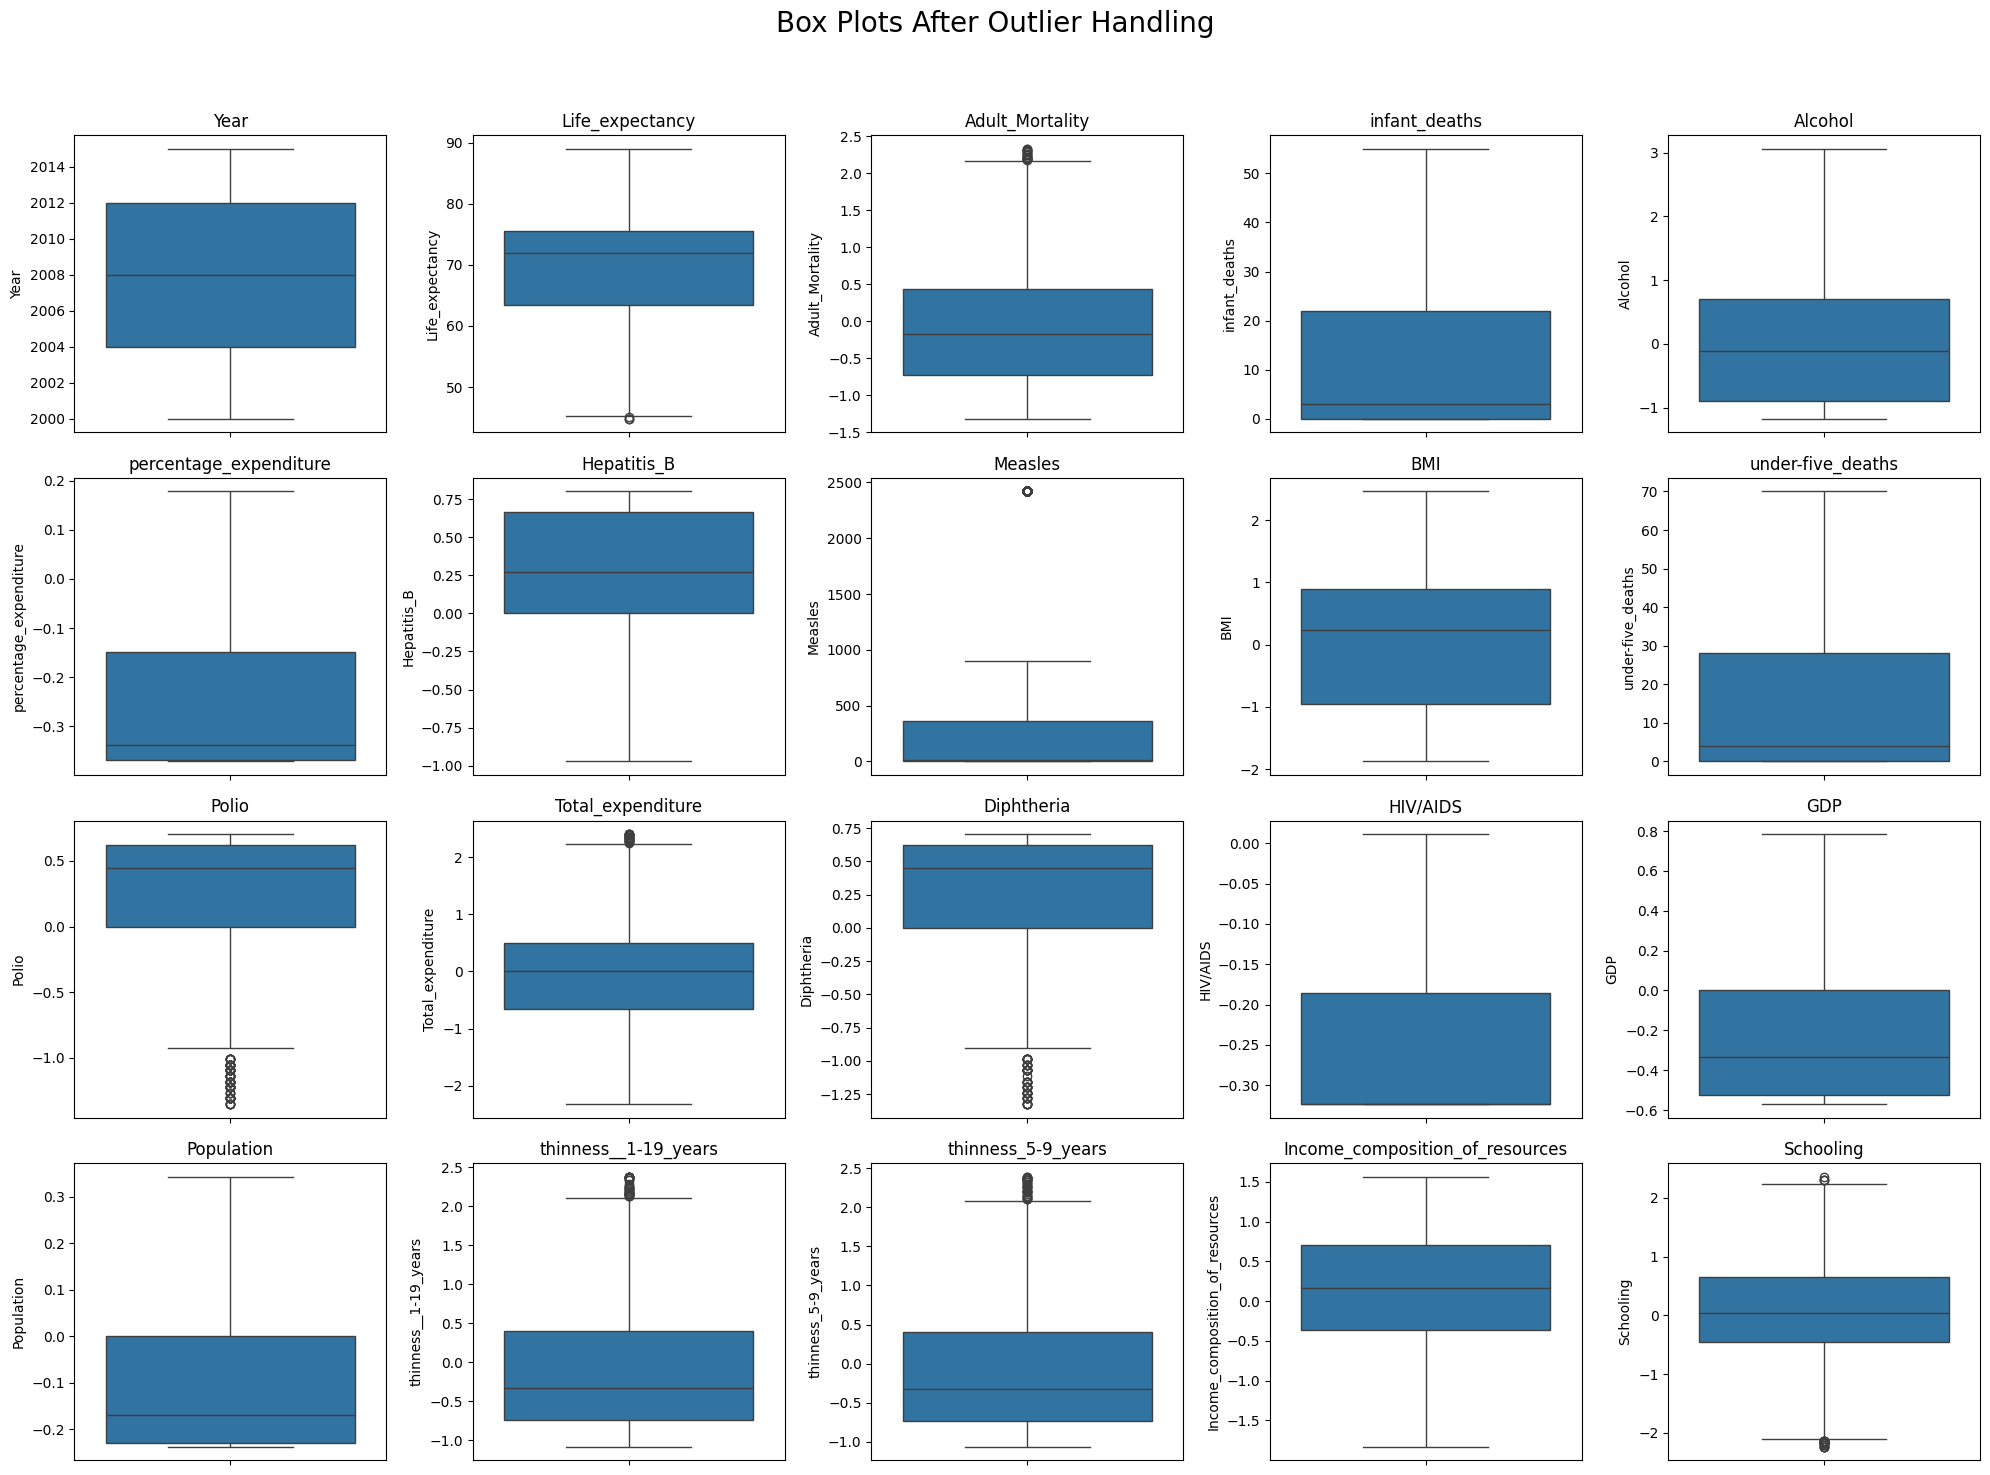

In [18]:
def visualize_boxplots(df, cols, title):
    num_cols = len(cols)
    rows = 4
    cols_per_row = 5
    fig, axes = plt.subplots(rows, cols_per_row, figsize=(20, 15))
    fig.suptitle(title, fontsize=20)

    for i, column in enumerate(cols):
        row, col = divmod(i, cols_per_row)
        sns.boxplot(data=df, y=column, ax=axes[row][col])
        axes[row][col].set_title(column, fontsize=12)
    for j in range(num_cols, rows * cols_per_row):
        fig.delaxes(axes.flatten()[j])

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
visualize_boxplots(df, numerical_columns, title="Box Plots After Outlier Handling")


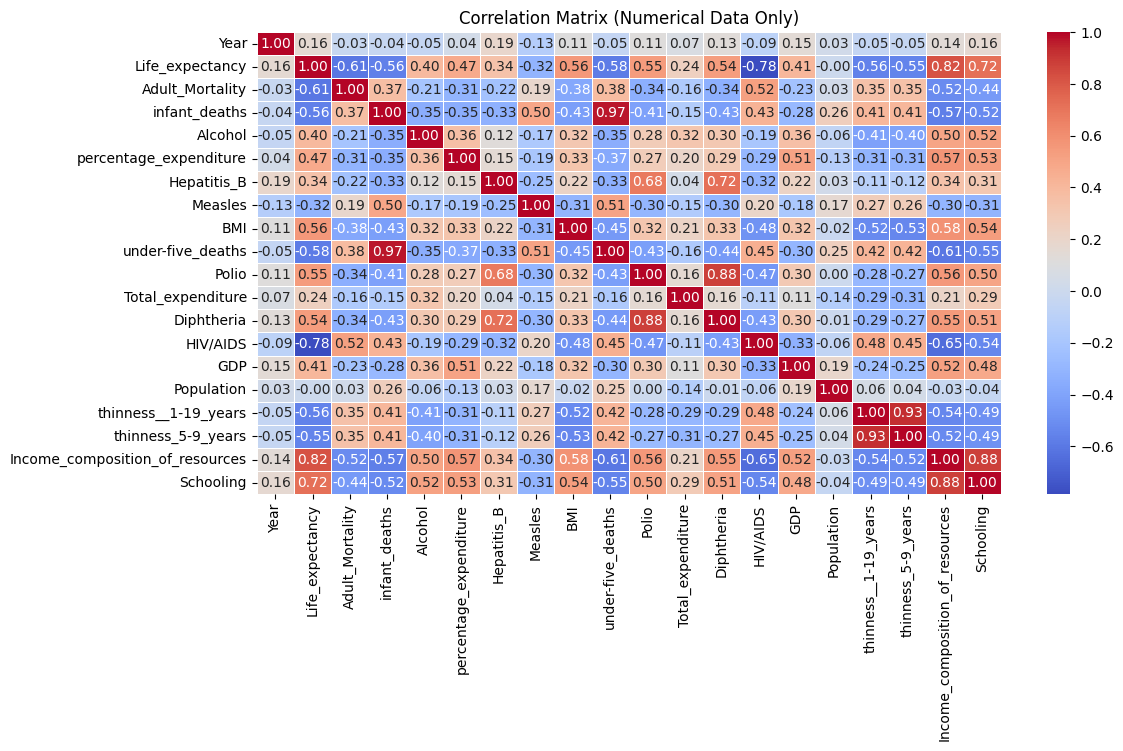

In [19]:
numerical_data = df.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix
corr_matrix = numerical_data.corr()
plt.figure(figsize=(12, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix (Numerical Data Only)')
plt.show()

 Should countries with low life expectancy (<65) increase healthcare expenditure?


In [20]:
low_life_expectancy = df[df['Life_expectancy'] < 65]

fig = px.scatter(
    low_life_expectancy,
    x='percentage_expenditure',
    y='Life_expectancy',
    color='Country',
    title='Healthcare Expenditure vs Life Expectancy (Below 65)'
)
fig.show()

How do infant and adult mortality rates affect life expectancy?

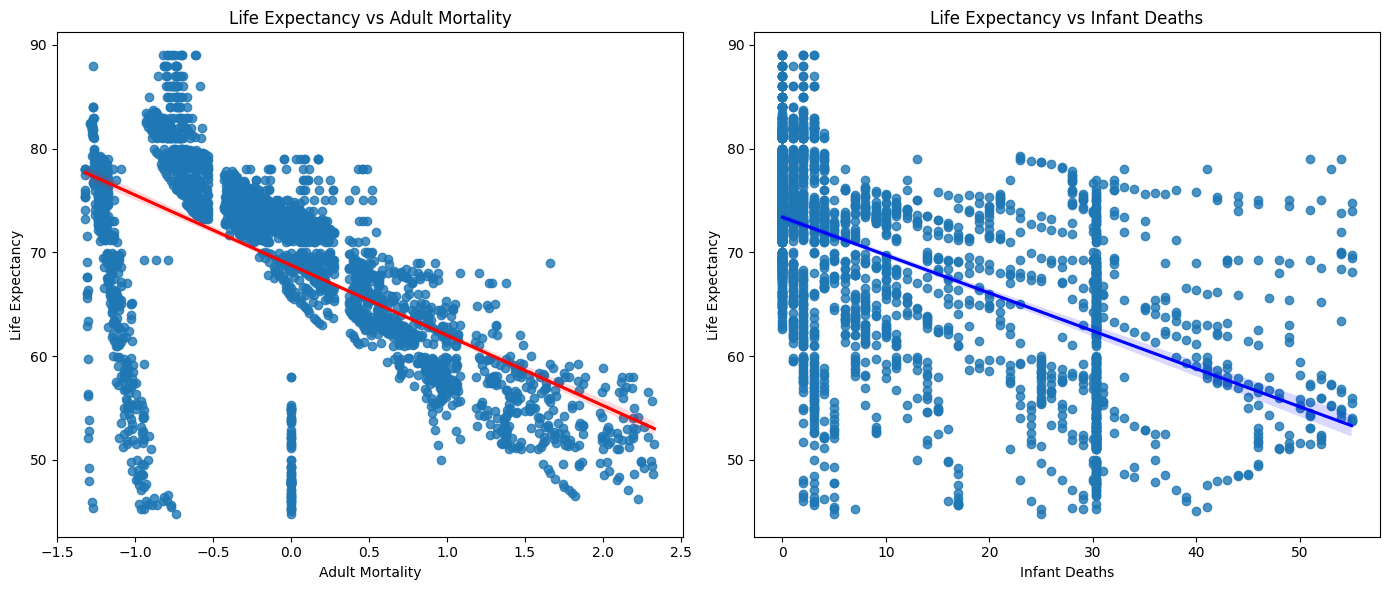

In [21]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.regplot(
    data=df,
    x='Adult_Mortality',
    y='Life_expectancy',
    ax=axes[0],
    line_kws={'color': 'red'}
)
axes[0].set_title('Life Expectancy vs Adult Mortality')
axes[0].set_xlabel('Adult Mortality')
axes[0].set_ylabel('Life Expectancy')
sns.regplot(
    data=df,
    x='infant_deaths',
    y='Life_expectancy',
    ax=axes[1],
    line_kws={'color': 'blue'}
)
axes[1].set_title('Life Expectancy vs Infant Deaths')
axes[1].set_xlabel('Infant Deaths')
axes[1].set_ylabel('Life Expectancy')
plt.tight_layout()
plt.show()


Does Life Expectancy have a positive or negative correlation with eating habits, lifestyle, exercise, smoking, drinking alcohol, etc.?

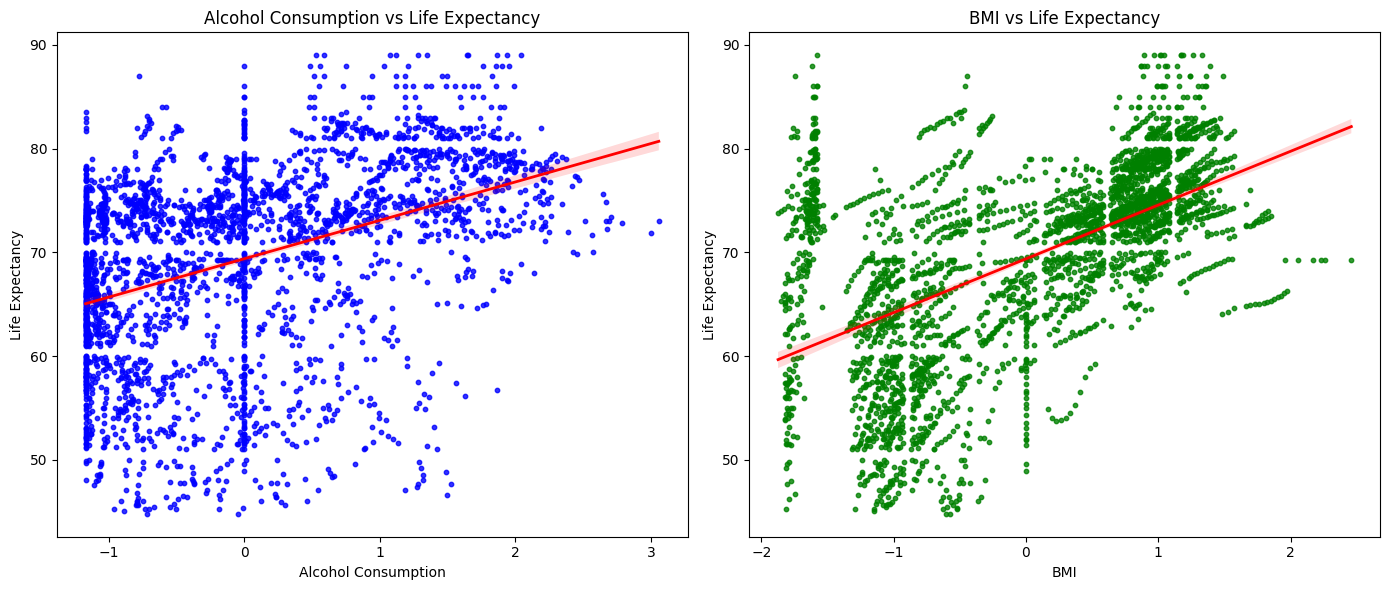

In [22]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
sns.regplot(
    x='Alcohol',
    y='Life_expectancy',
    data=df,
    ax=axes[0],
    scatter_kws={'color': 'blue', 's': 10},
    line_kws={'color': 'red', 'lw': 2}
)
axes[0].set_title('Alcohol Consumption vs Life Expectancy')
axes[0].set_xlabel('Alcohol Consumption')
axes[0].set_ylabel('Life Expectancy')
sns.regplot(
    x='BMI',
    y='Life_expectancy',
    data=df,
    ax=axes[1],
    scatter_kws={'color': 'green', 's': 10},
    line_kws={'color': 'red', 'lw': 2}
)
axes[1].set_title('BMI vs Life Expectancy')
axes[1].set_xlabel('BMI')
axes[1].set_ylabel('Life Expectancy')
plt.tight_layout()
plt.show()

What is the impact of schooling on the lifespan of humans?

In [23]:
fig = px.scatter(
    df,
    x='Schooling',
    y='Life_expectancy',
    color='Status',
    title='Schooling vs Life Expectancy'
)
fig.show()


Do densely populated countries have lower life expectancy?

In [24]:
fig = px.scatter(
    df,
    x='Population',
    y='Life_expectancy',
    color='Status',
    title='Population vs Life Expectancy'
)
fig.show()

Immunization Coverage and Life Expectancy

In [25]:
fig = px.scatter(
    df,
    x='Hepatitis_B',
    y='Life_expectancy',
    color='Status',
    trendline='ols',
    title='Hepatitis B Immunization vs Life Expectancy'
)
fig.show()

Life Expectancy vs GDP

In [26]:
fig = px.scatter(
    df,
    x='GDP',
    y='Life_expectancy',
    color='Status',
    hover_data=['Country'],
    title='Life Expectancy vs GDP',
    labels={'GDP': 'GDP (Log Scale)', 'Life expectancy': 'Life Expectancy'},
    log_x=True  # Apply log scale for better visualization
)
fig.show()

Life Expectancy by Status

In [28]:
fig = px.box(
    df,
    x='Status',
    y='Life_expectancy',
    color='Status',
    title='Life Expectancy by Status (Developed vs Developing)',
    labels={'Life expectancy': 'Life Expectancy'}
)
fig.show()

Life Expectancy vs HIV/AIDS

In [29]:
fig = px.scatter(
    df,
    x='HIV/AIDS',
    y='Life_expectancy',
    color='Status',
    trendline='ols',  # Add a trend line
    hover_data=['Country'],
    title='Life Expectancy vs HIV/AIDS',
    labels={'HIV/AIDS': 'HIV/AIDS (per 1,000 population)', 'Life expectancy': 'Life Expectancy'}
)
fig.show()

Distribution of Life Expectancy

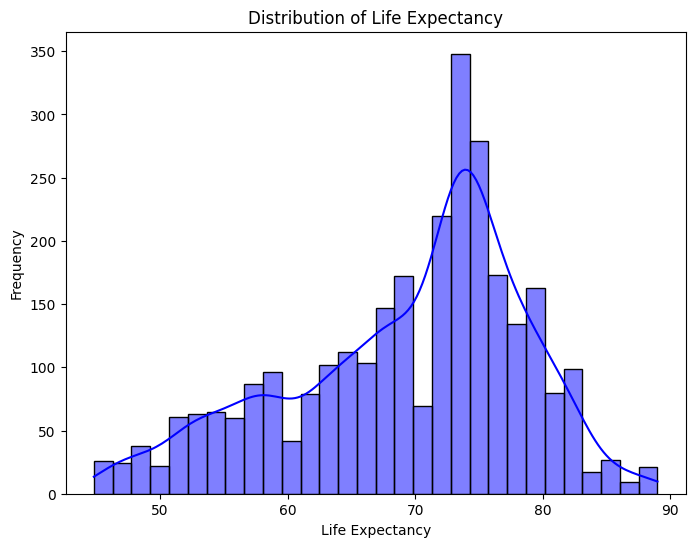

In [30]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Life_expectancy'], bins=30, kde=True, color='blue')
plt.title('Distribution of Life Expectancy')
plt.xlabel('Life Expectancy')
plt.ylabel('Frequency')
plt.show()

Income Composition vs Schooling

In [53]:
df['GDP'] = df['GDP'].clip(lower=0.01)

fig = px.scatter(
    df,
    x='Income_composition_of_resources',
    y='Schooling',
    color='Life_expectancy',
    size='GDP',
    hover_name='Country',
    title='Income Composition vs Schooling'
)
fig.show()

Average Life Expectancy Over the Years

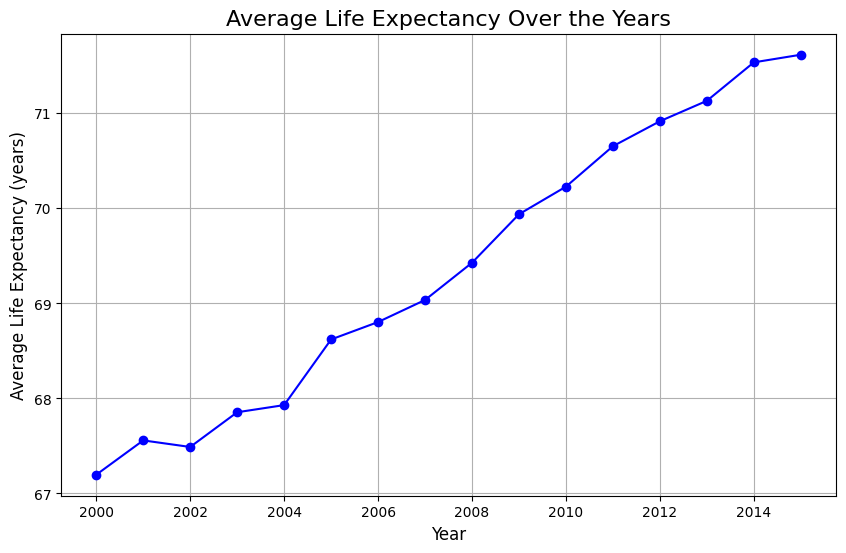

In [32]:
average_life_expectancy_per_year = df.groupby('Year')['Life_expectancy'].mean().reset_index()
average_life_expectancy_per_year.columns = ['Year', 'Average_Life_Expectancy']

plt.figure(figsize=(10, 6))
plt.plot(average_life_expectancy_per_year['Year'], average_life_expectancy_per_year['Average_Life_Expectancy'], marker='o', color='b')
plt.title('Average Life Expectancy Over the Years', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Life Expectancy (years)', fontsize=12)
plt.grid(True)
plt.show()

Count of Countries by Status

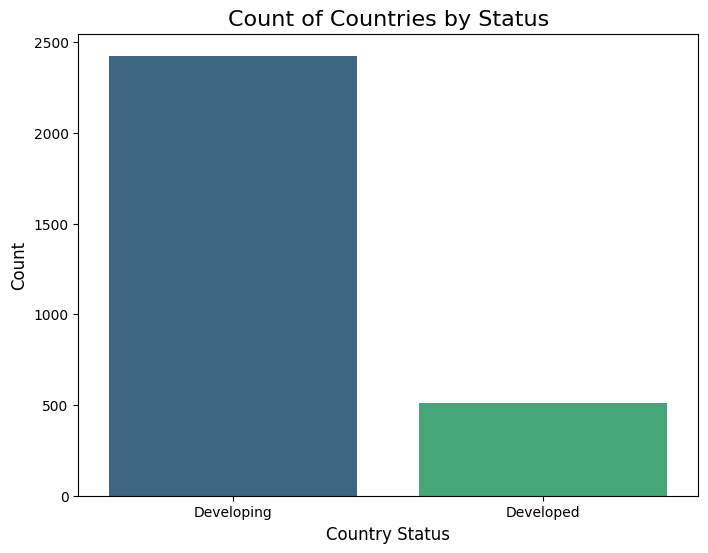

In [33]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Status', palette='viridis')

plt.title('Count of Countries by Status', fontsize=16)
plt.xlabel('Country Status', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

Average Life Expactancy for Status of Country

In [34]:
life_expact_status = df.groupby('Status')['Life_expectancy'].mean().reset_index()
fig = px.histogram(life_expact_status, x = 'Status', y='Life_expectancy', color='Status')
fig.update_layout(
title=dict(text='<b>Average Life Expactancy for Status of Country</b>', x=0.5)
)
fig.show()

Average Life Expectancy and Alcohol Consumption Over the Years

In [35]:
avg_life_expectancy = df.groupby('Year')['Life_expectancy'].mean()
avg_alcohol_consumption = df.groupby('Year')['Alcohol'].mean()

fig = go.Figure()
fig.add_trace(go.Scatter(
    x=avg_life_expectancy.index,
    y=avg_life_expectancy.values,
    mode='lines+markers',
    name='Average Life Expectancy',
    line=dict(color='blue', width=2),
    marker=dict(symbol='circle', size=8, color='blue')
))

fig.add_trace(go.Scatter(
    x=avg_alcohol_consumption.index,
    y=avg_alcohol_consumption.values,
    mode='lines+markers',
    name='Average Alcohol Consumption',
    line=dict(color='red', width=2),
    marker=dict(symbol='square', size=8, color='red')
))

fig.update_layout(
    title='Average Life Expectancy and Alcohol Consumption Over the Years',
    xaxis_title='Year',
    yaxis_title='Values',
    template='plotly_dark',
    font=dict(size=12, family='Arial'),
    height=600,
    legend=dict(x=0.1, y=0.9),
)
fig.show()


Average Alcohol Consumption for Developing and Developed Countries

In [36]:
avg_alcohol_status = df.groupby('Status')['Alcohol'].mean().reset_index()

fig = px.bar(
    avg_alcohol_status,
    x='Status',
    y='Alcohol',
    color='Status',
    title='Average Alcohol Consumption for Developing and Developed Countries',
    labels={'Status': 'Country Status', 'Alcohol': 'Average Alcohol Consumption'},
    template='plotly_dark',
)
fig.show()

Average Life Expectancy vs Years of Schooling

In [37]:
avg_life_expectancy_schooling = df.groupby('Schooling')['Life_expectancy'].mean().reset_index()

fig = px.scatter(
    avg_life_expectancy_schooling,
    x='Schooling',
    y='Life_expectancy',
    title='Average Life Expectancy vs Years of Schooling',
    labels={'Schooling': 'Years of Schooling', 'Life_expectancy': 'Average Life Expectancy'},
    template='plotly_dark',
)
fig.show()

Model Building

In [38]:
le = LabelEncoder()
cat_cols = df.select_dtypes(include = 'object').columns
for cols in cat_cols:
   df[cols] = le.fit_transform(df[cols])

In [39]:
print(df.columns)
df.columns = df.columns.str.strip()

Index(['Country', 'Year', 'Status', 'Life_expectancy', 'Adult_Mortality',
       'infant_deaths', 'Alcohol', 'percentage_expenditure', 'Hepatitis_B',
       'Measles', 'BMI', 'under-five_deaths', 'Polio', 'Total_expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness__1-19_years',
       'thinness_5-9_years', 'Income_composition_of_resources', 'Schooling'],
      dtype='object')


In [40]:
x = df.drop(columns='Life_expectancy')
y = df['Life_expectancy']

In [41]:
scaler = StandardScaler()
cols_to_scale = x.drop(columns='Status').columns

In [42]:
x[cols_to_scale] = scaler.fit_transform(x[cols_to_scale])

In [43]:
x.head()

,Country,Year,Status,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles,BMI,...,Polio,Total_expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness__1-19_years,thinness_5-9_years,Income_composition_of_resources,Schooling
0,-1.691042,1.621762,1,1.057680,1.351263,-1.176057,-0.553370,-2.391880,2.071994,-0.964715,...,-0.539321,1.094972,-2.254819,-0.634808,-0.240257,0.963765,0.145396,0.145978,-1.144346,-0.726426
1,-1.691042,1.404986,1,1.134943,1.351263,-1.176057,-0.545858,-2.717043,-0.023881,-0.989810,...,-2.792128,1.104265,-2.541909,-0.634808,-0.240257,-0.939099,0.145396,0.145978,-1.163816,-0.761514
2,-1.691042,1.188210,1,1.105970,1.351263,-1.176057,-0.546877,-2.500268,-0.091294,-1.014905,...,-2.425075,1.081034,-2.350516,-0.634808,-0.240257,0.963765,0.145396,0.145978,-1.202757,-0.796602
3,-1.691042,0.971434,1,1.144601,1.351263,-1.176057,-0.530255,-2.175105,2.071994,-1.040000,...,-1.966258,1.262237,-2.063426,-0.634808,-0.240257,-0.423119,0.145396,0.145978,-1.248189,-0.831691
4,-1.691042,0.754658,1,1.173575,1.351263,-1.176057,-0.768242,-2.066717,2.071994,-1.060076,...,-1.874495,0.960231,-1.967730,-0.634808,-0.240257,-0.533127,0.145396,0.145978,-1.306601,-0.936956


In [44]:
x_train, x_test, y_train, y_test = train_test_split(x, y,
test_size = 0.2, random_state = 30)
print(f"Shape of X_train is: {x_train.shape}")
print(f"Shape of Y_train is: {y_train.shape}\n")
print(f"Shape of X_test is: {x_test.shape}")
print(f"Shape of Y_test is: {y_test.shape}")

Shape of X_train is: (2350, 21)
Shape of Y_train is: (2350,)

Shape of X_test is: (588, 21)
Shape of Y_test is: (588,)


In [45]:
models = {
'Random Forest': RandomForestRegressor(random_state=42),
'Extra Trees Regressor':
    ExtraTreesRegressor(random_state=42),
'GradientBoost Regressor':
    GradientBoostingRegressor(random_state=42),
'XGB Regressor': XGBRegressor()
}
results = []

In [46]:
for model_name, model in models.items():
    model.fit(x_train, y_train)  # Fit the model on training data
    y_pred = model.predict(x_test)  # Make predictions on the test set

    mse = mean_squared_error(y_test, y_pred)

    # Manually calculate RMSE by taking the square root of MSE
    rmse = np.sqrt(mse)

    # Calculate R2 score
    r2 = r2_score(y_test, y_pred)

    # Store the results for each model
    results.append({'Model': model_name, 'RMSE': rmse, 'R2 Score': r2})

# Convert the results list to a DataFrame
results_df = pd.DataFrame(results)

In [47]:
results_df=results_df.sort_values("R2 Score", ascending = False)
results_df

,Model,RMSE,R2 Score
1,Extra Trees Regressor,2.312763,0.941229
0,Random Forest,2.354646,0.939081
3,XGB Regressor,2.417019,0.935810
2,GradientBoost Regressor,2.901101,0.907524


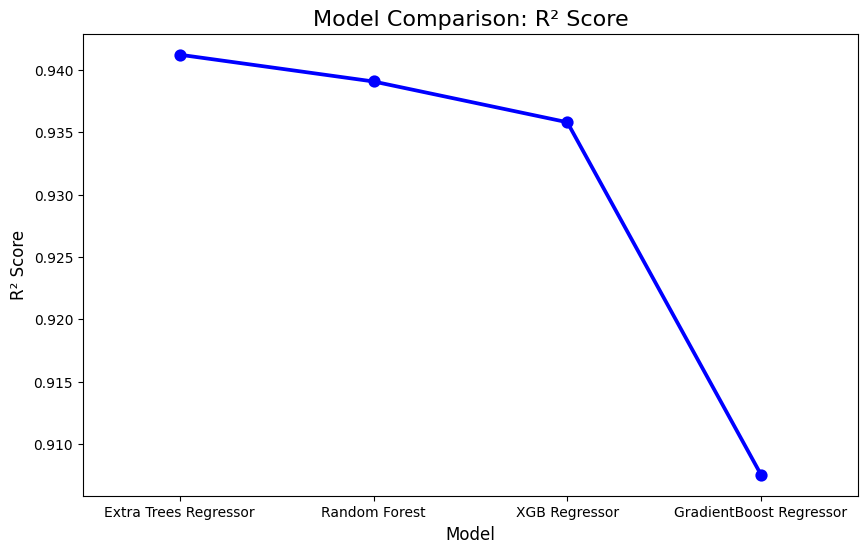

In [48]:
plt.figure(figsize=(10, 6))
sns.pointplot(
    x='Model',
    y='R2 Score',
    data=results_df,
    markers='o',
    color='blue',
    linestyles='-',
    dodge=True
)

# Add titles and labels
plt.title('Model Comparison: R² Score', fontsize=16)
plt.xlabel('Model', fontsize=12)
plt.ylabel('R² Score', fontsize=12)

# Show the plot
plt.show()

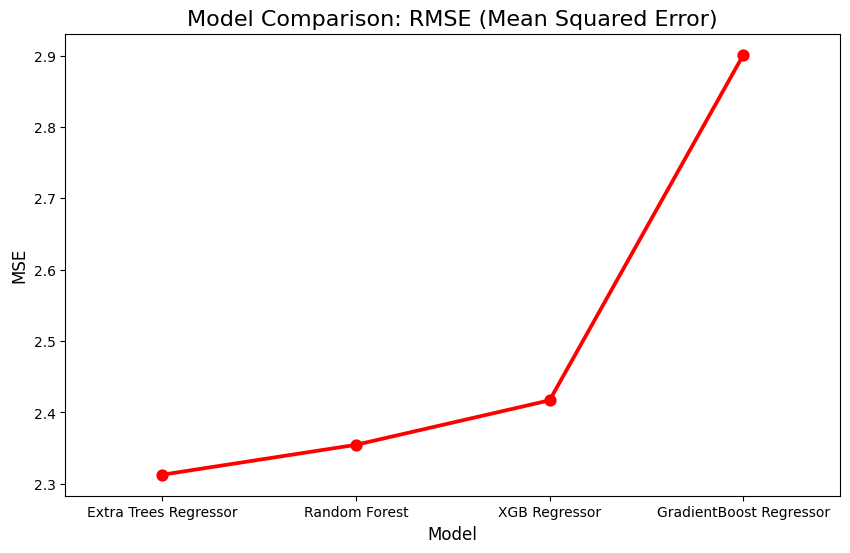

In [49]:
plt.figure(figsize=(10, 6))
sns.pointplot(
    x='Model',
    y='RMSE',
    data=results_df,
    markers='o',
    color='red',
    linestyles='-',
    dodge=True
)

# Add titles and labels
plt.title('Model Comparison: RMSE (Mean Squared Error)', fontsize=16)
plt.xlabel('Model', fontsize=12)
plt.ylabel('MSE', fontsize=12)

# Show the plot
plt.show()

Cross Validation

In [50]:
# cross Checking of Final Model
best_model = XGBRegressor()
kf = KFold(n_splits=20, shuffle=True, random_state=42)
cross_val = cross_val_score(best_model, x, y, cv= kf,
scoring='r2')
cross_val

array([0.96633332, 0.9041758 , 0.95942849, 0.95497882, 0.94534051,
       0.95019762, 0.95828948, 0.95590983, 0.93541908, 0.95517958,
       0.9525821 , 0.9415039 , 0.95021473, 0.94873682, 0.93827653,
       0.94971654, 0.93994374, 0.95535122, 0.95133067, 0.89839287])

Text(0.5, 1.0, 'Cross Validation scores')

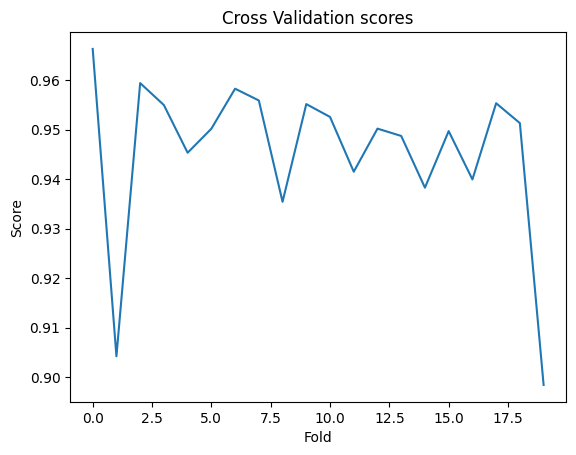

In [52]:
plt.plot(cross_val)
plt.xlabel('Fold')
plt.ylabel('Score')
plt.title("Cross Validation scores")
